**Project title:** Healthcare - Persistency of a drug<br>
**Group name:** DG_team_project_PL-RO-KSA-EGY<br>
**Github repo:** [https://github.com/Omar-Safwat/HealthCare_project](https://github.com/Omar-Safwat/HealthCare_project)<br>
**Week:** 11<br>


#### Team members
    
| Name | Specialization | Country | Email |
| :--- | --- | --- | --- | 
| Ms. Larisa Popa | Data Science | Romania |Larisapopa4@gmail.com |
| Ms. Afshan Hashmi | Data Science | Kingdom of Saudi Arabia | afshanhashmi786@gmail.com |
| Mr. Omar Safwat | Data Science | Egypt | omarksafwat@gmail.com |
| Mr. Roger Burek-Bors | Data Science | Poland | roger.burek-bors@hotmail.com |

In [1]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
%matplotlib inline
print("Libraries loaded")

Libraries loaded


In [2]:
# Loading dataset cleaned for EDA
df = pd.read_csv('cleaned_data.csv')
print("Dataset loaded")

Dataset loaded


In [3]:
df.head()

,Persistency_Flag,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,...,Ntm_Speciality_labels,Ntm_Specialist_Flag_labels,Ntm_Speciality_Bucket_labels,Risk_Segment_Prior_Ntm_labels,Tscore_Bucket_Prior_Ntm_labels,Risk_Segment_During_Rx_labels,Tscore_Bucket_During_Rx_labels,Change_T_Score_labels,Change_Risk_Segment_labels,Adherent_Flag_labels
0,Persistent,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,...,5.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
1,Non-Persistent,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,1,...,5.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,Non-Persistent,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,1,1,...,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,Non-Persistent,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,...,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,Non-Persistent,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,1,1,...,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [4]:
df.shape

(2004, 67)

**Hypothesis no 1: Since pulmonary NTM disease diagnosis requires a high-resolution CT scan of the lungs, features related to dexa scan (i.e. Dexa_Freq_During_Rx, Dexa_During_Rx) should contribute to drug persistency classification?**

In [5]:
df_dexa = df[['Dexa_Freq_During_Rx', 'Dexa_During_Rx']]
df_dexa

,Dexa_Freq_During_Rx,Dexa_During_Rx
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1999,0,0
2000,0,0
2001,0,0
2002,0,0


In [6]:
df_dexa.groupby(['Dexa_Freq_During_Rx']).count()

,Dexa_During_Rx
Dexa_Freq_During_Rx,
0,2004


In [7]:
df_dexa.groupby(['Dexa_During_Rx']).count()

,Dexa_Freq_During_Rx
Dexa_During_Rx,
0,2004


Unfortunately, after removing outliers remaining data related to dexa scan is useless for modelling. Both features Dexa_Freq_During_Rx and Dexa_During_Rx give 100% negative. These features should not contribute to modeling.

**Hypothesis no 2: Features associated with “Risk” in data set are very important classifier of drug persistency?**

In [8]:
df.columns

Index(['Persistency_Flag', 'Race', 'Ethnicity', 'Region', 'Age_Bucket',
       'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket',
       'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx',
       'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_Histo

In [9]:
df_risks = df[['Persistency_Flag', 'Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Change_Risk_Segment', 'Risk_Smoking_Tobacco',
       'Risk_Chronic_Malnutrition_Or_Malabsorption',
       'Risk_Family_History_Of_Osteoporosis', 'Risk_Vitamin_D_Insufficiency',
       'Count_Of_Risks', 'Risk_Segment_Prior_Ntm_labels',
       'Risk_Segment_During_Rx_labels', 'Change_Risk_Segment_labels']]
df_risks

,Persistency_Flag,Risk_Segment_Prior_Ntm,Risk_Segment_During_Rx,Change_Risk_Segment,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Family_History_Of_Osteoporosis,Risk_Vitamin_D_Insufficiency,Count_Of_Risks,Risk_Segment_Prior_Ntm_labels,Risk_Segment_During_Rx_labels,Change_Risk_Segment_labels
0,Persistent,VLR_LR,VLR_LR,No change,0,0,0,0,0,1.0,1.0,1.0
1,Non-Persistent,HR_VHR,HR_VHR,No change,1,0,0,0,1,0.0,0.0,1.0
2,Non-Persistent,HR_VHR,HR_VHR,No change,1,0,0,0,1,0.0,0.0,1.0
3,Non-Persistent,HR_VHR,HR_VHR,No change,1,0,1,0,2,0.0,0.0,1.0
4,Non-Persistent,HR_VHR,HR_VHR,No change,0,1,0,0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1999,Non-Persistent,VLR_LR,VLR_LR,No change,0,0,0,1,1,1.0,1.0,1.0
2000,Non-Persistent,VLR_LR,VLR_LR,No change,0,0,0,1,1,1.0,1.0,1.0
2001,Persistent,VLR_LR,VLR_LR,No change,0,0,0,1,1,1.0,1.0,1.0
2002,Non-Persistent,VLR_LR,VLR_LR,Worsened,0,0,0,0,0,1.0,1.0,2.0


In [11]:
df_risks2 = df_risks[['Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx']]
df_risks2

,Risk_Segment_Prior_Ntm,Risk_Segment_During_Rx
0,VLR_LR,VLR_LR
1,HR_VHR,HR_VHR
2,HR_VHR,HR_VHR
3,HR_VHR,HR_VHR
4,HR_VHR,HR_VHR
...,...,...
1999,VLR_LR,VLR_LR
2000,VLR_LR,VLR_LR
2001,VLR_LR,VLR_LR
2002,VLR_LR,VLR_LR


In [14]:
df_risks2['comparison'] = np.where(df_risks2['Risk_Segment_Prior_Ntm'] == df_risks2['Risk_Segment_During_Rx'], 1, 0)

<ipython-input-14-3e34765b03a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_risks2['comparison'] = np.where(df_risks2['Risk_Segment_Prior_Ntm'] == df_risks2['Risk_Segment_During_Rx'], 1, 0)


In [16]:
df_risks2.groupby(['comparison']).count()

,Risk_Segment_Prior_Ntm,Risk_Segment_During_Rx
comparison,,
0,64,64
1,1940,1940


Features: "Risk_Segment_Prior_Ntm" and "Risk_Segment_During_Rx" have nearly same values. Difference between this 2 features is around 3%. Therefore suggestion is to take only one of this features for modeling.

In [17]:
df_risks3 = df_risks.groupby(['Persistency_Flag']).sum()
df_risks3

,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Family_History_Of_Osteoporosis,Risk_Vitamin_D_Insufficiency,Count_Of_Risks,Risk_Segment_Prior_Ntm_labels,Risk_Segment_During_Rx_labels,Change_Risk_Segment_labels
Persistency_Flag,,,,,,,,
Non-Persistent,241,188,162,678,1769,868.0,842.0,1592.0
Persistent,112,64,34,222,570,262.0,234.0,482.0


<AxesSubplot:ylabel='Persistency_Flag'>

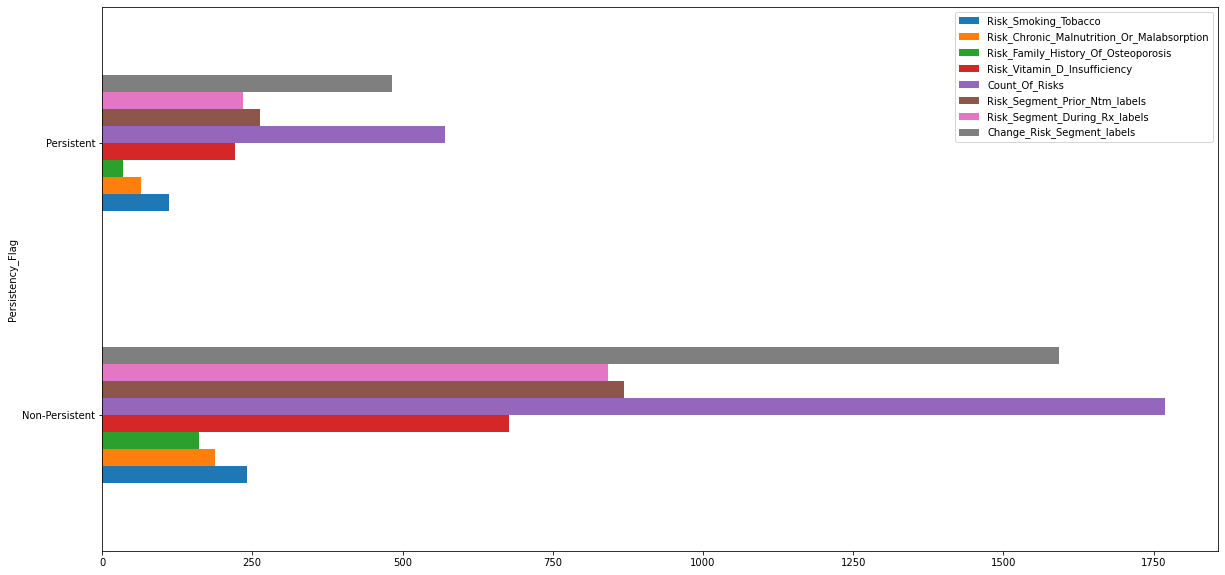

In [19]:
df_risks3.plot.barh(figsize=(20,10))

For modeling should be taken all of the features from df_risks apart “Risk_Segment_During_Rx_labels”.